In [21]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

## The logistic equation

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jds16/ModelingClass/master)

One of the simplest chaotic systems is the logistic map. Funtionally it is 

$$x_{n+1}=rx_n(1-x_n)$$

where *r* is a parameter and *n* represents the number generations. The populations for each generation (*x*) of depends on the previous generation. For example, if we let *r=2* the function looks like. 

Text(0, 0.5, '$x_{n+1}$')

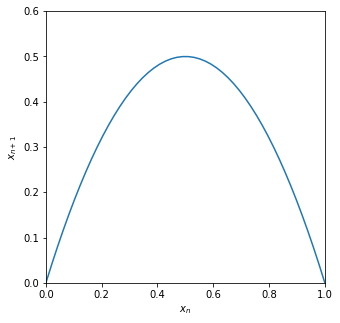

In [8]:
x1=np.linspace(0,1)
r=2
xi=0.1
x2=2*x1*(1-x1)

fig=plt.figure(figsize=[5,5])
ax=fig.add_subplot(111)
ax.plot(x1,x2)
ax.set_xlim([x1[0],x1[-1]])
ax.set_ylim([0,0.6])
ax.set_xlabel(r'$x_n$')
ax.set_ylabel(r'$x_{n+1}$')

Given an initial condition, we can see how *x* varies as a function of time based on the value that *r* takes. Below is an example that allows you to set *r* to three different ranges and shows the first 20 generations. I have assigned an initial population of 10%.

In [9]:
def logistic(r, x):
    return r * x * (1 - x)

In [10]:
def plot_gens(r):
    
    gnum=50
    
    t=np.linspace(0,gnum,num=gnum+1,endpoint=True)
    tnum=len(t)
    x=np.zeros(tnum)
    x[0]=0.1
    
    fig=plt.figure(figsize=[10,5])
    ax=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    ax2.plot(x1, logistic(r, x1), 'k', lw=2)
    ax2.plot([0, 1], [0, 1], 'k', lw=2)
    
    for i in range(tnum-1):
        x[i+1]=logistic(r, x[i])
        # Plot the two lines.
        ax2.plot([x[i], x[i]], [x[i], x[i+1]], 'k', lw=1)
        ax2.plot([x[i], x[i+1]], [x[i+1], x[i+1]], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax2.plot([x[i]], [x[i+1]], 'ok', ms=10,
                alpha=(i + 1) / tnum)
    
    ax.plot(t, x, 'k')
    ax.set_xlim([t[0], t[-1]])
    ax.set_ylim([0,1])
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel(r'$x_n$')
    ax2.set_ylabel(r'$x_{n+1}$')

    return

In [11]:
slider = interactive(plot_gens, r=(1, 4, 0.1))
display(slider)

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, min=1.0), Output()), _dom_classes=('wid…

There is also a dependence on initial conditions. In the plot below, you can vary the value of (*r*), the initial condition (*IC*), and the percent difference between the first and second initial condition (*IC_PD*).  

In [12]:
# add initial condition plot
def plot_ics(r,IC_PD, IC):
    
    gnum=50
    
    xi=0.1
    x2=2*x1*(1-x1)
    
    IC2=IC+IC*IC_PD/100
    
    t=np.linspace(0,gnum,num=gnum+1,endpoint=True)
    tnum=len(t)
    xic1=np.zeros(tnum)
    xic1[0]=IC
    xic2=np.zeros(tnum)
    xic2[0]=IC2
    #xic2[0]=0.11
    
    fig=plt.figure(figsize=[10,5])
    ax=fig.add_subplot(121)
    
    for i in range(tnum-1):
        xic1[i+1]=logistic(r, xic1[i])
        xic2[i+1]=logistic(r, xic2[i])
    
    ax.plot(t, xic1, 'C0', label='IC1='+str(IC))
    ax.plot(t, xic2, 'C1', label='IC2='+str(IC2))
    ax.set_xlim([t[0], t[-1]])
    ax.set_ylim([0,1])
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.legend(frameon=False, loc=1)

    return

In [13]:
slideric = interactive(plot_ics, r=(1, 4, 0.1), IC=(0,1,0.01), IC_PD=(0,10,0.001))
display(slideric)

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, min=1.0), FloatSlider(value=5.0, descri…

As an aside, we can prove to ourselves that although these systems may look random, they are not. In the plot below on the left, you can see the logistic equation and a random equation plotted against each other. Use the slider to vary *r* and *IC*.

In [22]:
# add noise plot
# add initial condition plot
def plot_noise(r, IC):
    
    gnum=1000
    
    t=np.linspace(0,gnum,num=gnum+1,endpoint=True)
    tnum=len(t)
    xic1=np.zeros(tnum)
    xic1[0]=IC
    
    fig=plt.figure(figsize=[10,5])
    ax=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    a=np.random.random(1000)
    
    for i in range(tnum-1):
        xic1[i+1]=logistic(r, xic1[i])
    
    ax.plot(t[-100:], xic1[-100:], 'C0', label='Deterministic')
    ax.plot(t[-100:], a[-100:], 'C1', label='Random')
    ax.set_xlim([t[-100], t[-1]])
    ax.set_ylim([0,1])
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.legend(frameon=False, loc=1)

    ax2.scatter(xic1[-101:-1], xic1[-100:],s=10, color='C0', label='Deterministic')
    ax2.scatter(a[-101:-1], a[-100:],s=10, color='C1', label='Random')
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
    ax2.set_xlabel('Population (n)')
    ax2.set_ylabel('Population (n+1)')
    ax2.xaxis.set_major_locator(MultipleLocator(20))
    ax2.xaxis.set_minor_locator(MultipleLocator(5))
    ax2.legend(frameon=True, loc=8)
    
    return

# add poincare map

In [15]:
slider_noise = interactive(plot_noise, r=(2.5, 4, 0.001), IC=(0,1,0.01))
display(slider_noise)

interactive(children=(FloatSlider(value=3.25, description='r', max=4.0, min=2.5, step=0.001), FloatSlider(valu…

The value of *r* is set by the *r_min* slider. The determinsitic equation shows the final 100 generations of 1000 total generations. On the right, we see the last 100 generations for a range of *r*. 

In [23]:
# add noise plot
# add initial condition plot
def plot_pmap(rmin, rmax, rnum, IC):
    
    if rmin>rmax:
        rmini=rmin
        rmin=rmax
        rmax=rmini
    
    gnum=1000
    
    evenly_spaced_interval = np.linspace(0, 1, rnum)
    colors = [plt.cm.viridis(x) for x in evenly_spaced_interval]
    
    rvals=np.linspace(rmin, rmax, num=rnum, endpoint=True)
    
    t=np.linspace(0,gnum,num=gnum+1,endpoint=True)
    tnum=len(t)
    xic1=np.zeros( (rnum, tnum) )
    xic1[:,0]=IC
    
    fig=plt.figure(figsize=[10,5])
    ax=fig.add_subplot(121)
    
    for i in range(rnum):
        for j in range(tnum-1):
            xic1[i,j+1]=logistic(rvals[i], xic1[i,j])
    
        ax.scatter(xic1[i,-101:-1], xic1[i,-100:],s=10, color=colors[i])
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('Population (n)')
    ax.set_ylabel('Population (n+1)')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    
    return

# add poincare map

In [24]:
slider_pcp = interactive(plot_pmap, rmin=(2.5, 4, 0.001), rmax=(2.5, 4, 0.001), rnum=(1,10,1), IC=(0,1,0.01))
display(slider_pcp)

interactive(children=(FloatSlider(value=3.25, description='rmin', max=4.0, min=2.5, step=0.001), FloatSlider(v…

As we increase *r* the population does not settle down to a single value. We can view this using a bifurcation diagram as well to gain more insight into the dynamics. Below you can create a bifurcation diagram for $2.5<=r<=4$. The slider below allows you to set the x-axis minimum.

In [25]:
def bifurcation_plot(xmin, xmax):
    
    if xmin>xmax:
        xmini=xmin
        xmin=xmax
        xmax=xmini
    
    n = 10000
    r = np.linspace(xmin, 4.0, n)

    iterations = 1000
    last = 100

    #x = 1e-5 * np.ones(n)
    x = 0.5 * np.ones(n)

    lyapunov = np.zeros(n)

    fig, ax1 = plt.subplots(1, 1, figsize=(8, 4),
                                   sharex=True)
    for i in range(iterations):
        x = logistic(r, x)
        # We display the bifurcation diagram.
        if i >= (iterations - last):
            ax1.plot(r, x, ',k', alpha=.25)
    #ax1.set_xlim(2.5, 4)
    ax1.set_title("Bifurcation diagram")
    ax1.set_xlim([xmin, xmax])

    plt.tight_layout()
    
    return

In [27]:
slider2 = interactive(bifurcation_plot, xmin=(2.5, 4, 0.001), xmax=(2.5, 4, 0.001))
display(slider2)

interactive(children=(FloatSlider(value=3.25, description='xmin', max=4.0, min=2.5, step=0.001), FloatSlider(v…

In [20]:
# add lyaponov 

## References
[IPython Interactive Computing and Visualization Cookbook: Chapter 12 (12.1. Plotting the bifurcation diagram of a chaotic dynamical system)](https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/)  

[Chaos Theory and the Logistic Map](https://geoffboeing.com/2015/03/chaos-theory-logistic-map/) 

[Mathematical methods in populationa dynamics](http://gi.ics.nara-wu.ac.jp/~takasu/lecture/graduate-20.html)  

[Hiding code in presentation mode](https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer)  

[Hiding code in presentatin mode-V2](https://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/)  

[Presenting Notebooks](https://www.youtube.com/watch?v=utNl9f3gqYQ)  